<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-exploration-and-cleaning" data-toc-modified-id="Data-exploration-and-cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exploration and cleaning</a></span></li><li><span><a href="#Training-the-neural-net" data-toc-modified-id="Training-the-neural-net-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Training the neural net</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Training-details" data-toc-modified-id="Training-details-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Training details</a></span></li></ul></li></ul></li><li><span><a href="#Modeling-results" data-toc-modified-id="Modeling-results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling results</a></span></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model evaluation</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Future-work" data-toc-modified-id="Future-work-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Future work</a></span><ul class="toc-item"><li><span><a href="#Data-augmentation-(completed-in-this-version)" data-toc-modified-id="Data-augmentation-(completed-in-this-version)-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span><del>Data augmentation</del> (completed in this version)</a></span></li><li><span><a href="#Progressive-resizing(completed-in-this-version)" data-toc-modified-id="Progressive-resizing(completed-in-this-version)-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span><del>Progressive resizing</del>(completed in this version)</a></span></li><li><span><a href="#Including-more-features" data-toc-modified-id="Including-more-features-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Including more features</a></span></li><li><span><a href="#Data-collection" data-toc-modified-id="Data-collection-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Data collection</a></span></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Model evaluation</a></span></li></ul></li></ul></div>

# Mushroom  Species Classification 

The purpose of this project is for me to learn about deep learning with PyTorch, using the fastai front end. 

**Keywords:** neural nets, deep learning, pytorch, fastai, transfer learning, fine tuning, one cycle learning, discriminative learning rates, fine grain classification. 

## Introduction

Being able to tell one mushroom species from another can mean the difference between picking yourself a tasty meal or ending up with something that could make you sick or even lead to death. Approximately 14,000 species of mushrooms have been cataloged worldwide and creating a classifier that has been trained on all of these species presents a data collection challenge that I was not prepared to undertake. In this project, I wanted to perform the data collection and data cleaning steps myself, to keep things manageable I decided to work toward creating a classifier that will be useful to people foraging in a more localized geographical area. I learned that mushroom foraging is a popular activity in the Canadian province of British Columbia. Being a Canadian myself, this is the region I decided to focus my efforts on. 

## Data exploration and cleaning

The list of species of mushroom to included in this project was obtained from [The University of British Columbia Zoology website](https://www.zoology.ubc.ca/~biodiv/mushroom/). This directory contains a list of edible and poisonous species of coastal BC and the Pacific Northwest. There are three reasons that I choose this database to draw from:

    1. This list includes the majority of the most common mushroom species found in BC.
  
As a result, even though my classifier only includes 73 species of mushrooms (of the thousands of possible species), my final mushroom classifier may have some utility for people searching for mushrooms in this limited geographical region. 
   
    2. The list contains numerous instances of mushroom species coming from the same family.
    3. Included in the information provided about each species is a list of mushroom species that look similar to the given species. 
    
This is desirable because it adds a significant challenge to the problem. It would have been much easier to distinguish between species of mushrooms that have substantially different features. Using the information about similarity, 18 species of mushroom that looked similar to the 58 species of mushrooms in the UBC database where identified, giving a total of 76 species.  

The top 300 images (using the species name as the search term) were downloaded from bing image search using [Google/Bing Images Web Downloader](https://github.com/ultralytics/google-images-download).

This tool had the advantage of allowing me to automate the gathering of a data set containing over 22,000 images in 76 categories. However, this automation comes at the cost of introducing a substantial amount of noise into the data set. The top 300 image search results included the following types of undesired images:

    1. Cartoon images
    2. Images that did not contain mushrooms
    3. Images that contained more than one type of mushroom
    4. Images that were too zoomed out
    5. Images that were too close up
    6. Images with writing or objects obscuring the mushrooms
    7. Images that featured objects such as people, swiss army knives, baskets, tupperware, cell phones
    8. Images that did not contain any intact mushrooms
    9. Black and white images
    10. duplicate images
    11. Images of cooked mushrooms
    12. Images of moldy mushrooms
    13. Blurry images 
    14. Images that were too small
    15. Low contrast images

My reasoning for removing these images was that they would be misleading the classifier in some way. For instance, I noticed that several images contained a swiss army knife. These images originated from the same source, it appeared that this person had taken pictures of various mushrooms with the swiss army knife included for size comparison. If those images were included in the training set, they could easily be confused for one another and lead to misclassification of the mushroom in the image. The initial data set was cleaned by me, I made two passes through the entire set of images, looking at each image, and deleting any misleading images. In the process of doing this, three of the categories ended up with fewer than 50 images, these categories were excluded from the final data set. The final data set contains 16729 images from 73 categories, 80 percent of the images were used for training, the remaining 20 percent was used for validation (sometimes also referred to as the test set). Looking through every single image like this is very time consuming and tedious (in this case I spent nearly 15 hours), at the same time, data cleaning is an indispensable part of any machine learning workflow. 

> The first step to training a neural net is to not touch any neural net code at all and instead begin by thoroughly inspecting your data. This step is critical. I like to spend a copious amount of time (measured in units of hours) scanning through thousands of examples, understanding their distribution, and looking for patterns.
-- Andrej Karpathy (Director of AI, Tesla)

Some of these types of noise such as images of non-mushroom and cartoon images can be removed from the data set without introducing substantial limitations as to the types of images that can be input by a user in the final production model. Removal of other types of noise (zoomed out images, zoomed-in images, blurry images, etc...) introduces limitations on the generalizability of the model that need to be communicated to the user so that she can obtain the most reliable predictions from the model. For example, the limitations on the input image might read: Pictures should be in colour, from close up, of the whole intact fresh (not rotted, not cooked) mushroom(s). It may also be a good idea to further guide the user by providing examples of acceptable and unacceptable images.

Acceptable images:

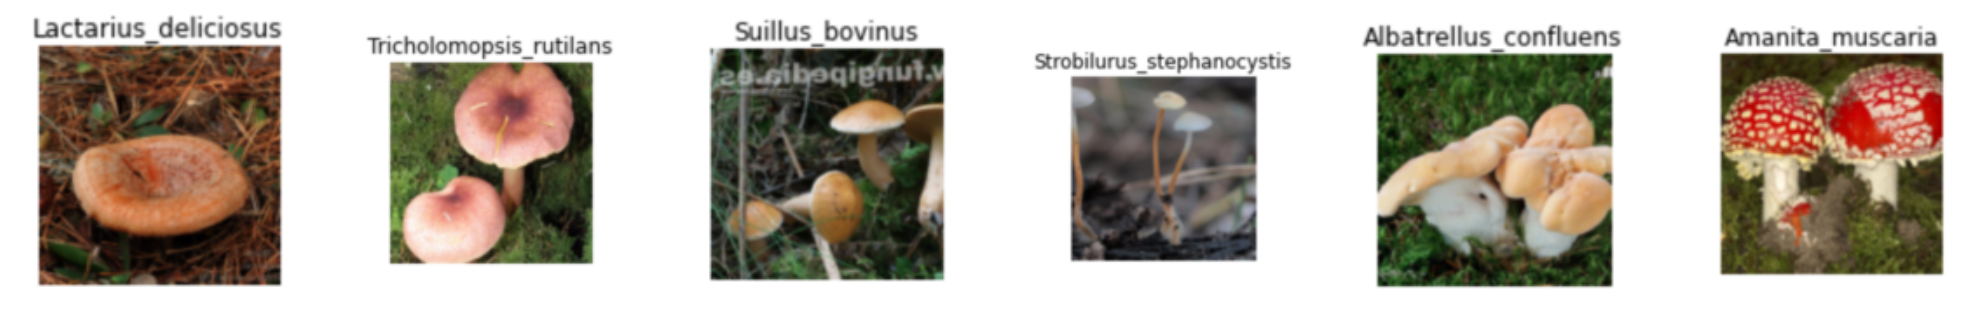

Unacceptable images:

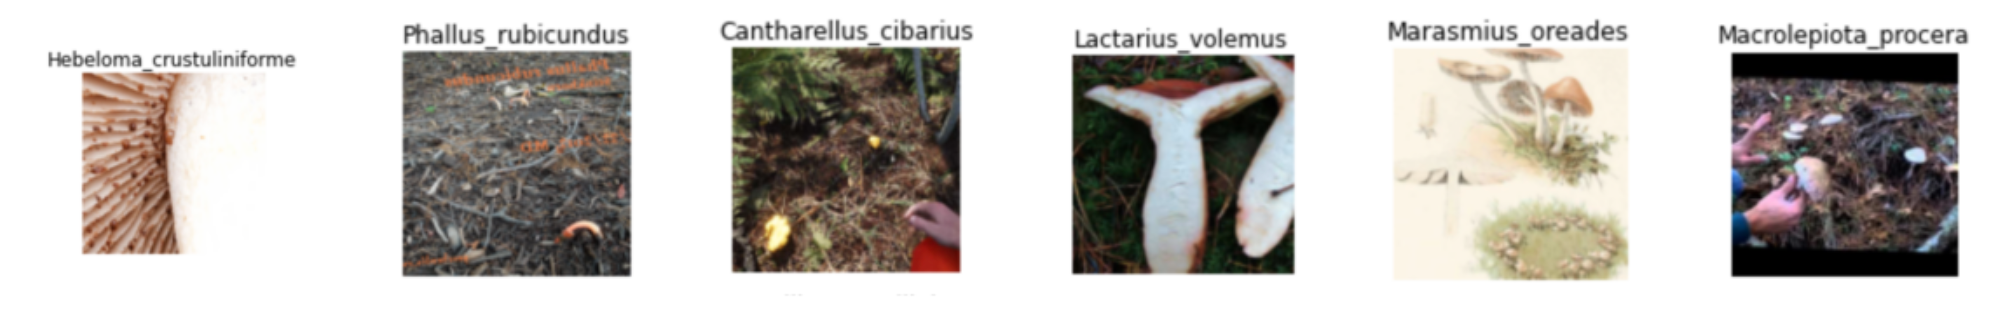

## Training the neural net 

We import all the necessary packages. We will be building our classifier using the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/), which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). 

In [8]:
from fastai.imports import *
from fastai.vision import *
from fastai.metrics import error_rate
from zipfile import ZipFile

In [9]:
# with ZipFile('mushroom_classification_data_cleaned.zip', 'r') as zip_ref:
#     zip_ref.extractall()

In [10]:
path = Path('data/mushroom_classification_data_cleaned/')

In [11]:
df = pd.read_csv(path/'cleaned.csv', header='infer')

In [12]:
def get_data_learner(bs, size):
    tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2)
    np.random.seed(33)
    data = ImageDataBunch.from_df(path, df, valid_pct=0.2, ds_tfms=tfms, size=size, bs=bs).normalize(imagenet_stats)
    learn = cnn_learner(data, models.resnet50, metrics=error_rate, wd=1e-2)
    return data, learn

In [39]:
data, learn = get_data_learner(bs=64, size=224)

In [18]:
data.train_ds

LabelList (13384 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus,Hortiboletus_rubellus
Path: mushroom_classification_data_cleaned

In [19]:
data.valid_ds

LabelList (3345 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Calocybe_gambosa,Kuehneromyces_mutabilis,Cortinarius_rubellus,Paxillus_atrotomentosus,Cantharellus_cibarius
Path: mushroom_classification_data_cleaned

In the first version of the project, I restricted myself to the techniques introduced to me in the first three lessons of the course ["practical deep learning for coders"](https://course.fast.ai/). For this version of the project, I tried out some things that were left to future work.  

For the neural net architecture, I choose resnet50, a convolutional neural network designed to perform well on image classification tasks. Rather than initializing the parameters of the neural net randomly, we will use a pre-trained version of resnet50 that has been trained with over 1 million images from the [imagenet](http://www.image-net.org/) database, consisting of images from 1000 categories. This idea is known as transfer learning. Transfer learning will allow us to train a neural network that is good at recognizing images of mushrooms, with a relatively small amount of data. It works because the neural net starts out already able to recognize images, it only needs to be fine-tuned and specialized to recognize mushroom images.  

Another idea that can be useful when working limited datasets is to generate more data from the data that you already have by applying transformations, this is known as data augmentation. When choosing which transforms we will apply to our data there are two important considerations:

1. The transforms should change the images enough to them look different from the original images.
2. The transforms should not change the image so much that it no longer resembles an image of a mushroom. 

The fastai library has a method known as "get_transforms()", by default this method fetches the following transforms, which are each applied with a certain probability each time an image is shown to the neural network:

1. Flipping across the horizontal axis
2. Rotation between -10 degrees and 10 degrees
3. Zoom between 1x and 1.1x
4. Lighting and contrast change
5. A symmetric warp of magnitude between -0.2 and 0.2

Using the fastai default set of transforms led to the best results. A good source for a more detailed explanation of these transforms with examples, is the fastai documentation for [get_transforms](https://docs.fast.ai/vision.transform.html#get_transforms). 

Let's take a look at the first example in the training dataset.

In [20]:
x,y = data.train_ds[0]

Hortiboletus_rubellus


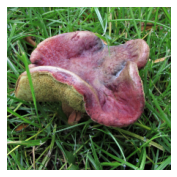

In [21]:
print(y)
x.show()

Transforms are applied to images on the fly each time they are shown to the network. To give an idea of the effect of the chosen transforms, the figure below displays 8 transformed versions of this first training example.

In [22]:
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2)
print(len(tfms))

2


In [27]:
def plot_tfms(image, rows, cols, height, width, **kwargs):
    [x.apply_tfms(tfms[0], **kwargs).show(ax=ax) for i, ax in enumerate(plt.subplots(rows, cols, figsize=(width, height))[1].flatten())]      

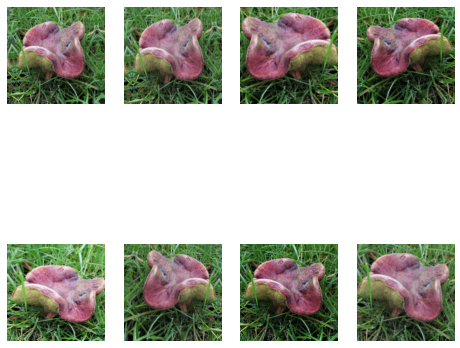

In [28]:
plot_tfms(x, 2, 4, 8, 8, size=224)

After reading in the cleaned data, cropping and resizing the images to size 224 by 224 pixels, choosing a set of transforms for data augmentation and randomly splitting the data into a training set (80%), and a validation set (20%). I looked at several random subsets of the data (example below) to make sure that images were cropped and resized properly. The Data were also normalized using the same stats as were used during the pretraining of resnet50. 

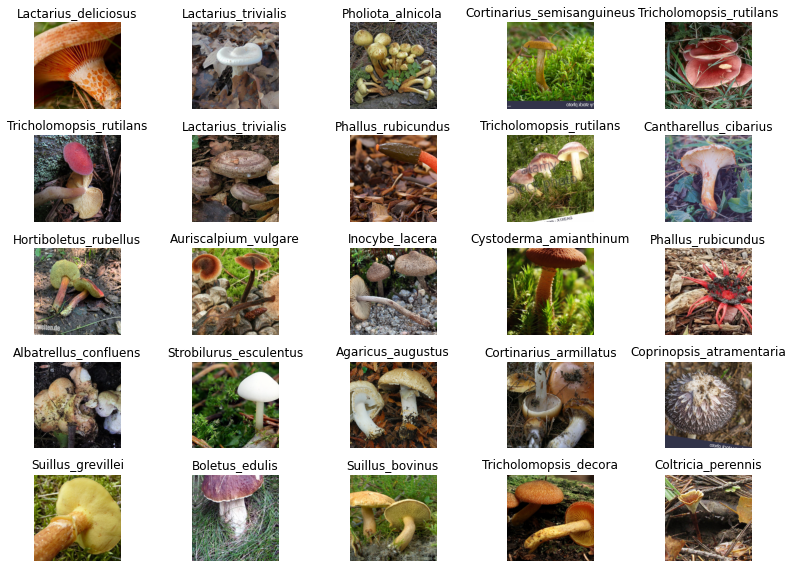

In [30]:
data.show_batch(rows=5, figsize=(11,8))

### Training 

I initiated a fastai convolutional neural network learner by putting the data together with the resnet50 pretrained model and choosing a metric (error rate) for model evaluation. Cross entropy loss was used as the loss function. 

To take advantage of the predictive power of the pretrained model, transfer learning was applied. In the first stage we only train the output layer of the network, parameters (weights and biases) from earlier layers are not allowed to change. The next step is to train the parameters from earlier layers of the network and see if that helps to improve the model. To do that I first unfreeze the model making weights from earlier layers of the model trainable. When training the unfrozen model, rather than just specifying a single maximum learning rate, we specify a lower bound and an upper bound for the maximum learning rate. For example, when the lower bound is 1e-5 and the upper bound is 1e-4. The first layer will be trained (using one cycle fitting) with a max learning rate of 1e-5. The learning rate for subsequent layers is increased linearly until finally the last layer is trained using a max learning rate of 5e-4. This is known as discriminative learning rates.

This model was trained using the fastai implementation of the one cycle fitting policy developed by Leslie Smith. Kostas Mavropalias has laid out an excellent explanation of the one cycle fitting policy, found [here](https://iconof.com/1cycle-learning-rate-policy/). L2-regularization was also used, the fastai library implements this as weight decay. Weight decay coefficients of 0.1, 0.01 (default), and, 0.001 were tried, in the end, the default value of 0.01 proved to work best. The Adam (Adaptive Moment Estimation) optimizer was used to optimize the network. [Adam](https://ruder.io/optimizing-gradient-descent/index.html#adam) combines momentum with RMSprop.

Throughout model training, I explored a range of learning rates and made a plot of learning rates against losses to help me choose an efficient learning rate. The learning rate for each stage of the model training was determined by looking for the learning rate that corresponds to the steepest negative slope in these plots and then experimenting with learning rates 10x greater and 10x lower to settle on an optimal learning rate.  

Training loss was compared to validation loss to monitor training progress at each stage and to determine if the model was over or under fitted. To make these plots smoother and more easily readable, an exponentially weighted average of the loss is plotted rather than the loss itself. 

#### Training details

In [10]:
def find_plot_lr(learner):
    learner.lr_find()
    learner.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


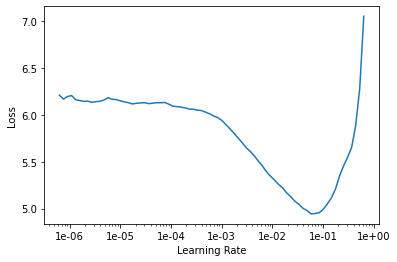

In [41]:
find_plot_lr(learn)

In [42]:
learn.fit_one_cycle(10, max_lr=1e-2)

In [43]:
learn.save('224-stage-1')

In [44]:
learn.fit_one_cycle(4, max_lr=1e-3)

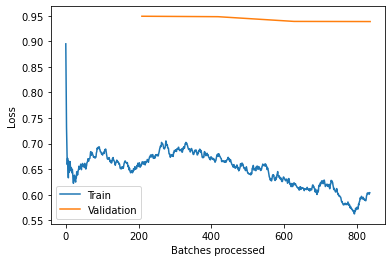

In [45]:
learn.recorder.plot_losses()

In [46]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


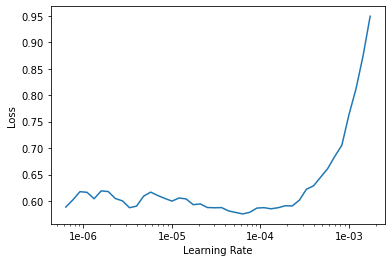

In [47]:
find_plot_lr(learn)

In [48]:
learn.save('224-stage-2')

In [49]:
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-4))

In [50]:
learn.save('224-stage-3')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


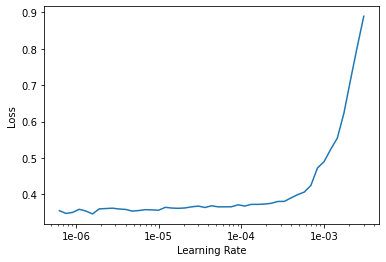

In [51]:
find_plot_lr(learn)

In [62]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-5))

In [63]:
learn.save('224-stage-4')

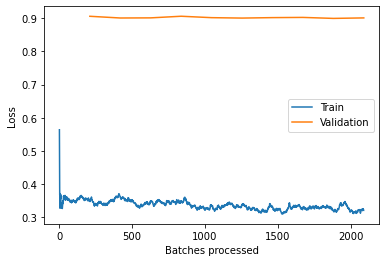

In [64]:
learn.recorder.plot_losses()

In [65]:
data, learn = get_data_learner(bs=64, size=336)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


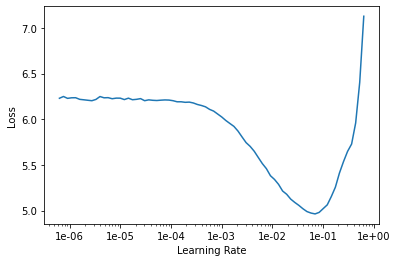

In [67]:
find_plot_lr(learn)

In [68]:
learn.fit_one_cycle(10, max_lr=1e-2)

In [69]:
learn.save('336-stage-1')

In [70]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


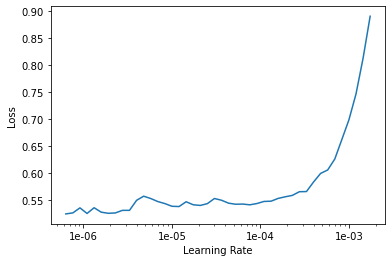

In [71]:
find_plot_lr(learn)

In [73]:
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-4))

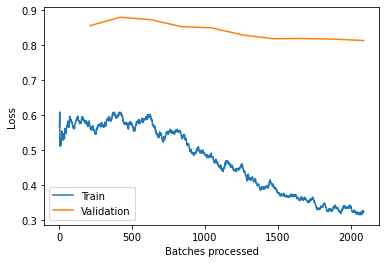

In [74]:
learn.recorder.plot_losses()

In [75]:
learn.save('336-stage-2-final-model')

**Total training time** was ~113 mins on gcloud vm instance with:

<u>Machine type</u><br>
n1-highmem-8 (8 vCPUs, 52 GB memory)

<u>GPUs</u><br>
1 x NVIDIA Tesla P100


## Modeling results

In [80]:
# The classificationInterpretation object contains all the information needed to interperate the model.
# The things that I will looking at in the next few cells
interp = ClassificationInterpretation.from_learner(learn)

The plot belows shows the images from the validation set for which the loss is greatest, along with their predicted class, actual class, loss, and probability of actual class.

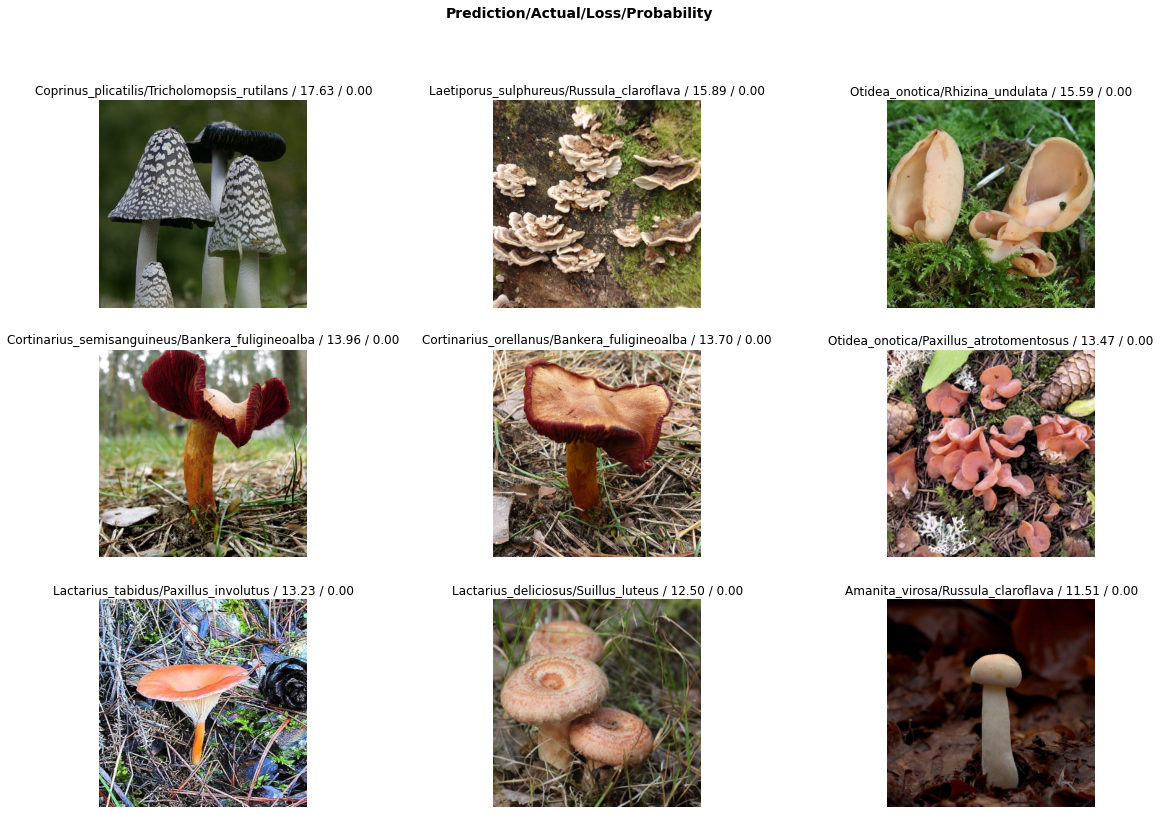

In [81]:
interp.plot_top_losses(9, figsize=(20,13))

After investigating more closely, I found that all nine of these images were mislabeled in the initial data set. In seven of the nine cases, the predicted class labels are correct. In the remaining two cases, the images strongly resemble mushrooms in the predicted classes in terms of shape, geometry, and common surroundings. So even after the substantial data cleaning steps taken here, there is still a degree of noise in the data set in the form of mislabeled images. As a non-expert, it was difficult for me to identify mislabeled images during data cleaning. For future iterations of this project, It could be useful to clean the data further by running this model on the entire dataset (training and validation) and using the top losses to identify and delete mislabeled images.

Next, I plot the confusion matrix to get some insight into not only the performance of the model but also which classes are being predicted correctly, which incorrectly, and what type of errors are being made. Species are listed along the axis in alphabetical order, so that species with the same family name appear clustered together. 

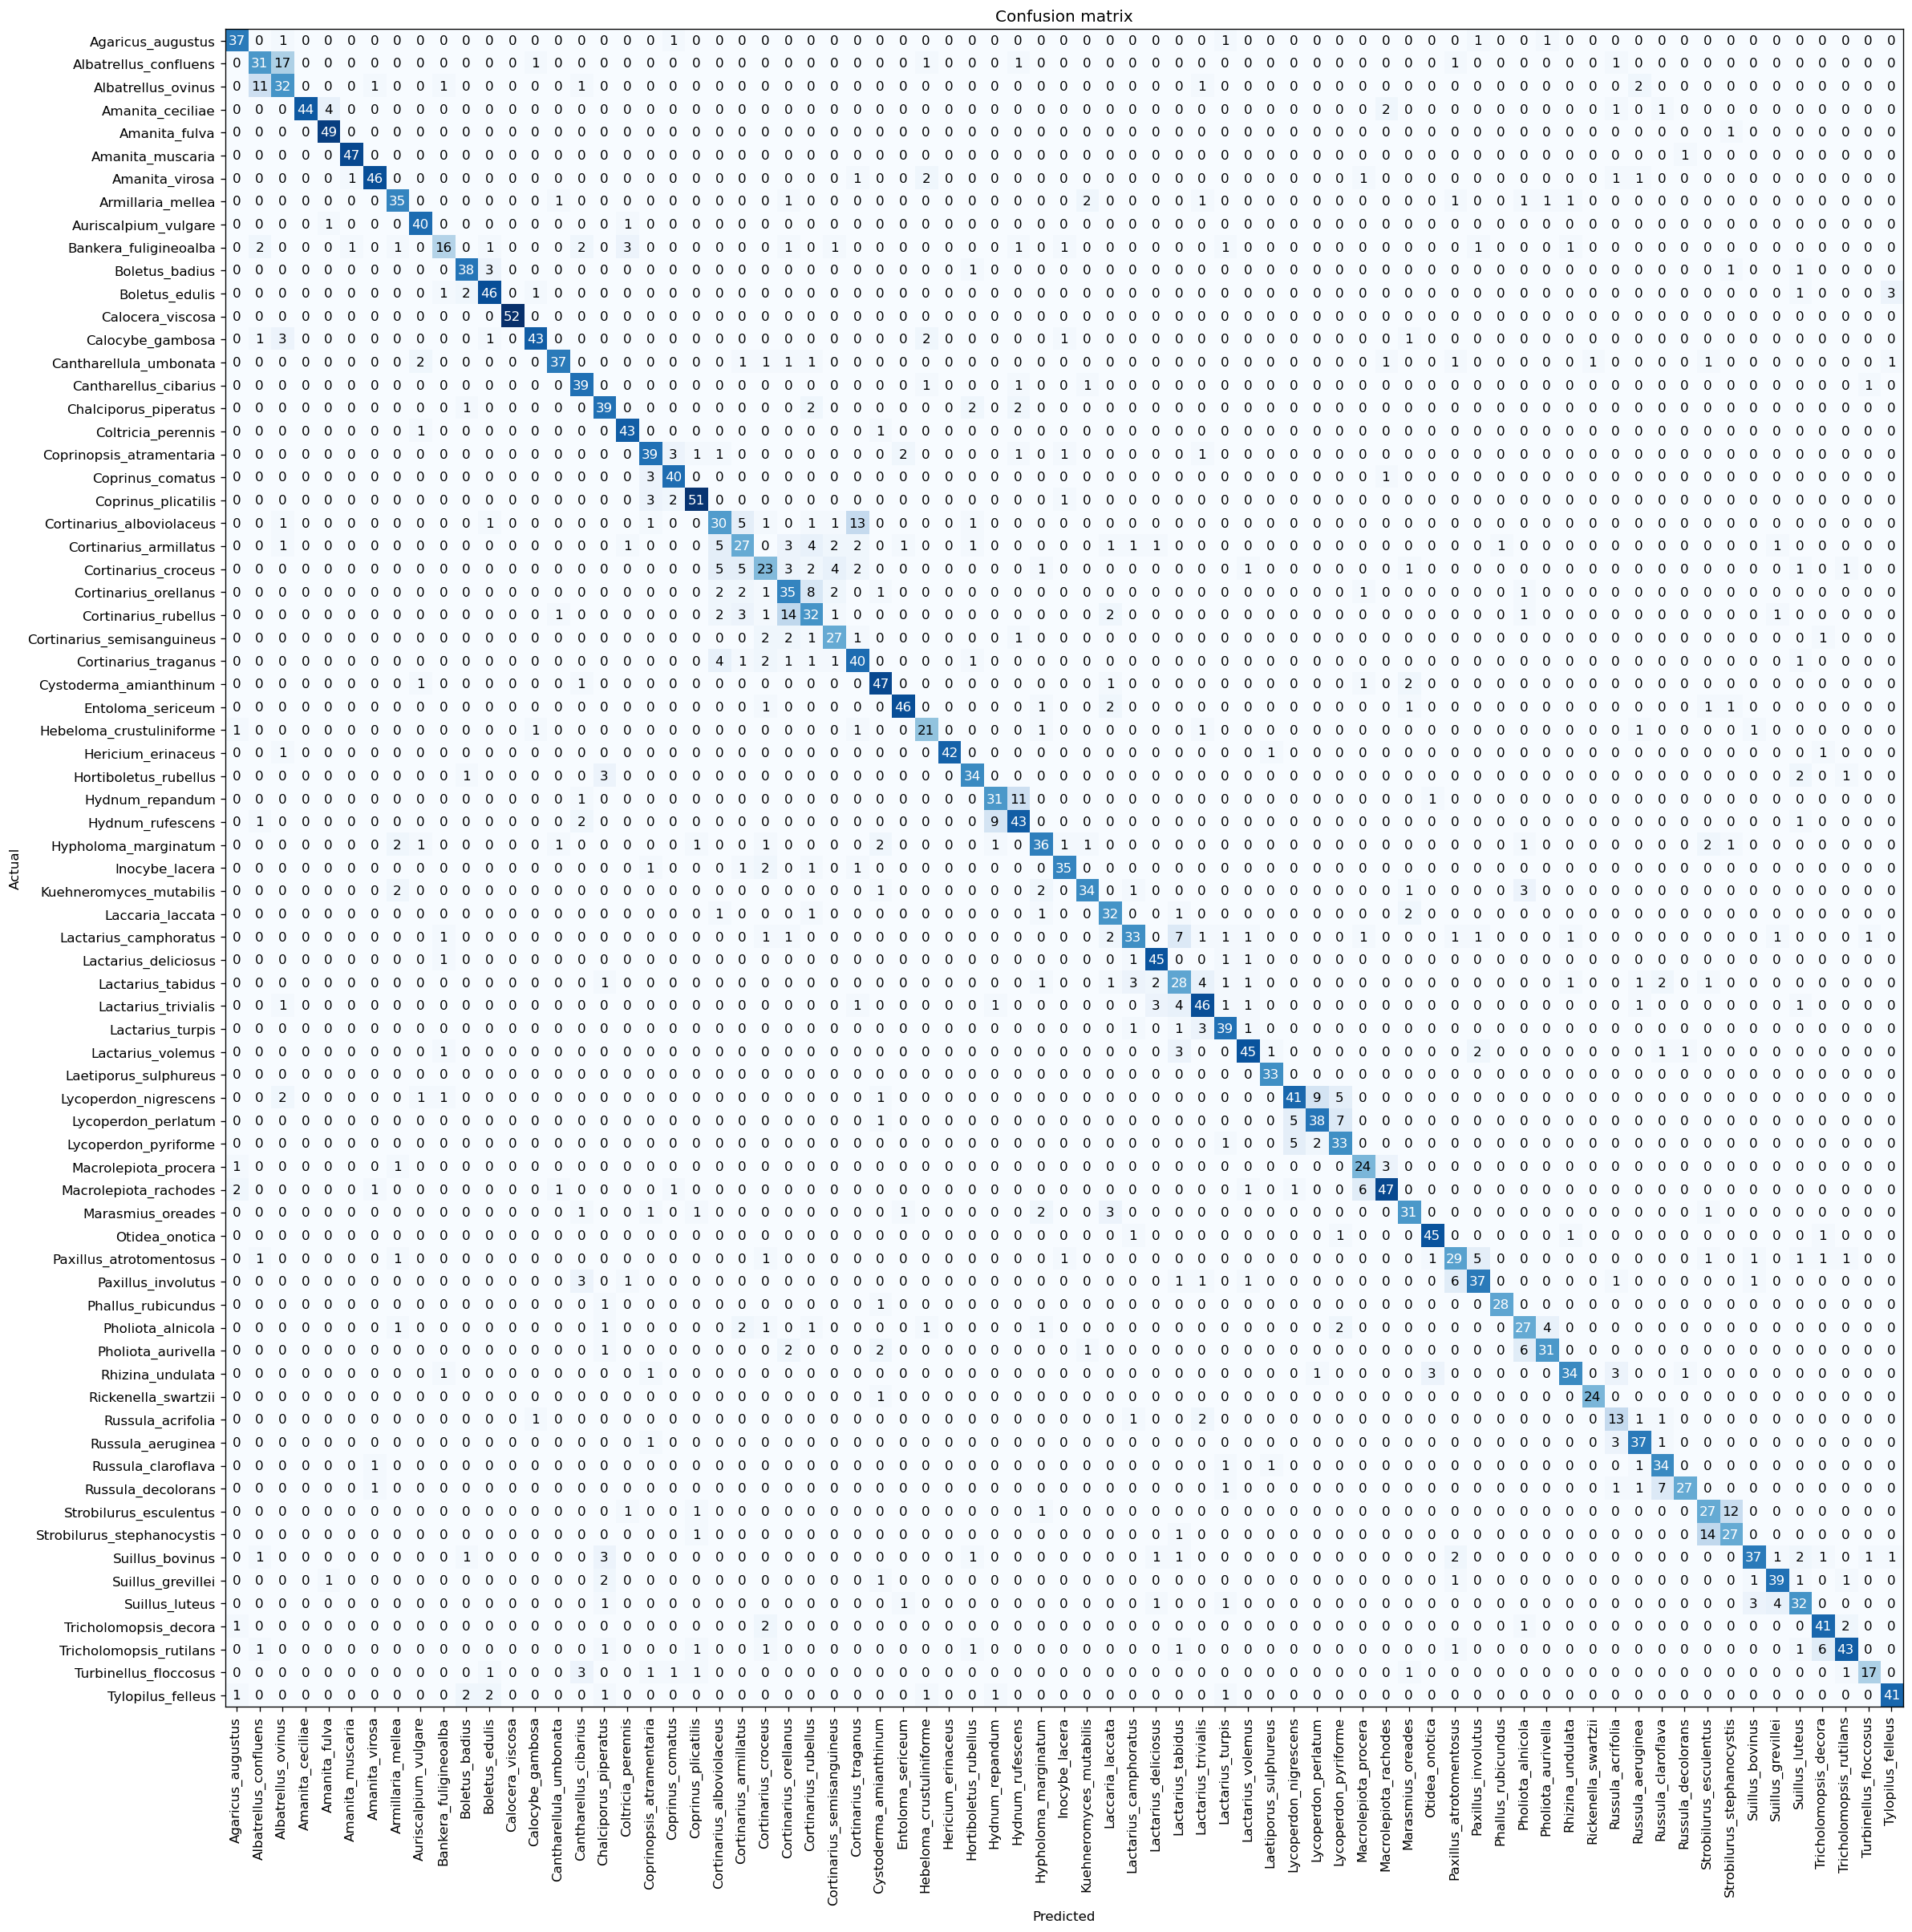

In [82]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=120)

The vast majority of misclassifications are concentrated close to the diagonal, with most of them occurring just one position off the diagonal. Where there are four or more misclassifications recorded at a distance greater than one-off the diagonal it is because there is a mushroom family with more than two representatives in the dataset. This indicates that the classifier has the most difficulty in discriminating between mushroom species that belong to the same family, which is to be expected. 

Finally, let's look at a list of the most common misclassifications. This information is also contained in the confusion matrix, but it can be easier to read in the listed format and it is easier to identify the most commonly confused cases. 

In [83]:
# Same info as in confusion matrix but easier to see the worst cases.
interp.most_confused(min_val=5)

[('Albatrellus_confluens', 'Albatrellus_ovinus', 17),
 ('Cortinarius_rubellus', 'Cortinarius_orellanus', 14),
 ('Strobilurus_stephanocystis', 'Strobilurus_esculentus', 14),
 ('Cortinarius_alboviolaceus', 'Cortinarius_traganus', 13),
 ('Strobilurus_esculentus', 'Strobilurus_stephanocystis', 12),
 ('Albatrellus_ovinus', 'Albatrellus_confluens', 11),
 ('Hydnum_repandum', 'Hydnum_rufescens', 11),
 ('Hydnum_rufescens', 'Hydnum_repandum', 9),
 ('Lycoperdon_nigrescens', 'Lycoperdon_perlatum', 9),
 ('Cortinarius_orellanus', 'Cortinarius_rubellus', 8),
 ('Lactarius_camphoratus', 'Lactarius_tabidus', 7),
 ('Lycoperdon_perlatum', 'Lycoperdon_pyriforme', 7),
 ('Russula_decolorans', 'Russula_claroflava', 7),
 ('Macrolepiota_rachodes', 'Macrolepiota_procera', 6),
 ('Paxillus_involutus', 'Paxillus_atrotomentosus', 6),
 ('Pholiota_aurivella', 'Pholiota_alnicola', 6),
 ('Tricholomopsis_rutilans', 'Tricholomopsis_decora', 6),
 ('Cortinarius_alboviolaceus', 'Cortinarius_armillatus', 5),
 ('Cortinarius_ar

All of the misclassifications on the list are cases where one species of mushroom is confused for another species of mushroom from the same family. 

## Model evaluation

Given that we have 73 nearly balanced classes, if we were to classify each image randomly we could expect to be correct approximately 1/73 = 1.3% of the time. The final model classifies image with an accuracy of 78%, which beats the random baseline by a good margin. 

The analysis of the results showed that most of the classification errors were within family misclassifications (one species of mushroom mistaken for another in the same family) or were the result of mislabeled instances in the training data. It should be possible to improve the classification accuracy by taking more careful data cleaning steps.

## Summary

In version-1 of the project:

I gathered and cleaned mushroom images for 58 of the most common species found in the BC area, along with 18 species that are known to look similar to those 58 species. After cleaning, there remained images for 73 classes of mushrooms. I applied transformations to augment the data. Finally, I trained a classifier by finetuning a pretrained resnet50 model. The classifier achieved an error rate of 22% (78% accuracy). In contrast, the same model finetuned using the uncleaned data achieved an error rate of ~32%.

In this version:

I tried applying a wider range of transformations to the data set. I also experimented with different batch sizes and image sizes. Finally I tried increasing regularization by weight decay. In all cases, deviating from fastai default settings negatively impacted the accuracy of the model predictions.

## Future work

Mushroom species classification is both an interesting problem because of its utility and because of the challenge that it presents. I intend to continue to improve the accuracy and generalizability of this model as I learn more about deep learning and other machine learning models and tools. The final step in this project will be to field test the model and put it into production making available to the BC mushroom foraging community. There are several possible avenues that I already have in mind that may improve the model. 

### ~~Data augmentation~ (completed in this version)

~~It may be possible to increase the generalizability and accuracy of the model by including more transforms (such as random cropping and resizing, random resizing and cropping) in the data augmentation step.~

~~I also noticed that there are some images of upside-down mushrooms in my data set, leading me to believe that it is a good idea to include a vertical flip transform.~

~~These steps should help to make the model able to handle images that contain a wide range of mushroom orientations or that capture only part of a mushroom, allowing me to simplify the instructions that a user will need to understand and follow to get a reliable prediction from the model.~

### ~~Progressive resizing~(completed in this version)

~~The idea behind progressive resizing is to increase the amount of data that your model sees in training by train a model on several resized versions of your data set. Typically you start with images of a smaller size than the final size that you intend to use to train the final model and work your way up to this maximum size. For instance, a resizing workflow for our application might look like this:~

1. Finetune resnet50 using our images resized to 56x56 pixels and save this model.
2. Finetune the model obtained in step 1 using our images resized to 122x112 pixels and save this model.
3. Finetune the model in step 2 using our images resized to 224x224 pixels.

### Including more features  

"""A mushroom guide is a must for anyone interested in foraging for mushrooms. It's helpful if the guide includes pictures of poisonous mushrooms, but because of the sheer number of possibilities, it's even more helpful if the guide can zero in on a species as you enter information about the specimen you found. One such mushroom guide, posted by researchers from the University of Aarhus and University of Copenhagen, Denmark, is available online. It's called MycoKey, and it isn't the only such guide.

A number of factors enter into a positive identification. They include not just appearance, but also location, season and growing conditions. Even if you can't make a positive identification, some general characteristics can alert you to the likelihood of a dangerous species."""

Many mushroom species (particularly those in the same family) are  similar in apearance. Musroom guides such as the one created by researchers from the University of Aarhus and University of Copenhagen([MycoKey](http://www.mycokey.com/)), typically incorparate a number of factors beyond appearance when trying to make a positive identification. These factors include location, season, and growing conditions.

### Data collection

Another way that the accuracy and generalizability of the model could be improved is to train it using more data. This means finding more images for each of the 73 categories of mushrooms that make up the scope of the classifier and or expanding the scope of the classifier by added more mushroom categories. It will be necessary to expand the number of categories somewhat to cover more of the possible mushrooms that BC foragers could run into out in the woods. For instance, the Amanita phalloides (AKA 'death cap') mushroom often closely resembles the Lycoperdon perlatum (AKA 'Common puffball') mushroom, which is inside the scope of the classifier. Amanita phalloides isn't included in this first version of the classifier, which could lead to unfortunate consequences if the model were deployed as-is. One possible source to draw on comes from Denmark. The University of Copenhagen issued a fungi classification challenge in 2018. As part of the challenge, they released a [dataset](https://snm.ku.dk/english/news/all_news/2018/2018.5/the-fungi-classification-challenge/) contained 1,394 wild mushrooms species, with 85,578 training images and 4,182 validation images. Location, season, and growing condition data (among other things) will also need to be collected to fulfill the goals outlined in the previous section. 

### Model evaluation

I used error rate (1 - accuracy) as the metric to evaluate this model. This was a reasonable choice because we have a multiclass classification problem with balanced classes. In future interations of the project it will be important to determine if the model is classifying any poisonous or deadly mushrooms as edible. Percision with respect to the edible class, will provide a ideal metric for this sort of evaluation. 
